In [1]:
import pandas as pd

## Data Loading and Preparation:



The dataset is loaded using pd.read_csv and unnecessary columns are dropped.


Displaying the first few rows and basic information about the dataset helps understand its structure.


In [2]:
df = pd.read_csv(r'D:\ITI\Graduation proj\huggingface\sentiment140.csv', encoding='latin-1', header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Drop unnecessary columns
df.columns=['Sentiment', 'id', 'Date', 'Query', 'User', 'Tweet']


In [4]:
df.head()

,Sentiment,id,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df.drop(columns=['id', 'Date', 'Query', 'User'], axis=1)

In [6]:
df.head()

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Data Exploration:

In [7]:
# Display the information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Tweet      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
# Check for missing values
df.isnull().sum()


Sentiment    0
Tweet        0
dtype: int64

In [9]:
# Get descriptive statistics
df.describe()


,Sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [10]:
# Check unique values in the Sentiment column
df["Sentiment"].unique()

array([0, 4], dtype=int64)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df["Sentiment"].value_counts()

Sentiment
0    800000
4    800000
Name: count, dtype: int64

## Sentiment Distribution: Plotting the count of each sentiment class helps in understanding the class balance.


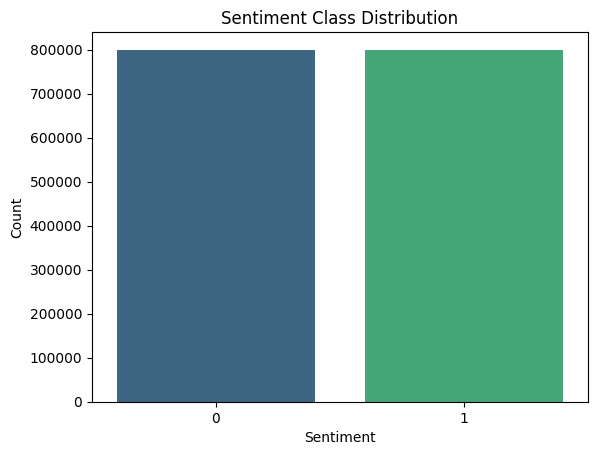

In [13]:
# Plotting the distribution of sentiment classes
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()


## Tweet Length Distribution: Adding a new column for tweet lengths and plotting its distribution provides insights into the variation in tweet lengths.


c:\Users\LightHouse\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


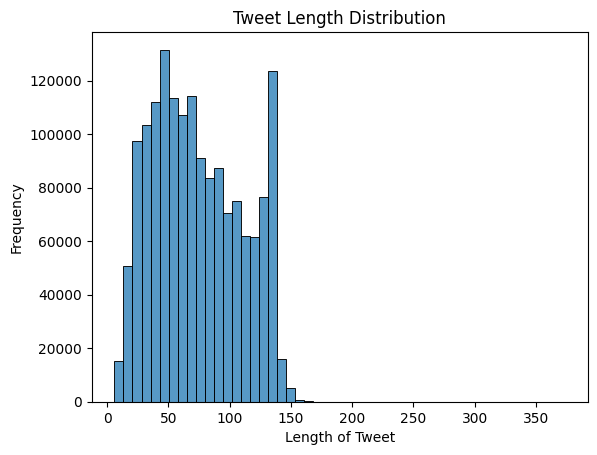

In [14]:
# Create a new column for the length of each tweet
df['tweet_length'] = df['Tweet'].apply(len)

# Plotting the distribution of tweet lengths
sns.histplot(df['tweet_length'], bins=50)
plt.title('Tweet Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()


In [31]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
# Define regular expressions for hashtags and mentions
hashtags_re = re.compile(r"#\S+")
mentions_re = re.compile(r"@\S+")

In [ ]:
# Define the process_text function
def process_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = hashtags_re.sub(' hashtag', text)  # Replace hashtags with 'hashtag'
    text = mentions_re.sub(' entity', text)  # Replace mentions with 'entity'
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip().lower()  # Return cleaned text

In [34]:
# Check raw tweets for hashtags
print("Raw Tweets with Hashtags:")
print(df[df['Tweet'].str.contains(r"#\S+")]['Tweet'].head(10))

Raw Tweets with Hashtags:
83                           @markhardy1974 Me too  #itm
175    @machineplay I'm so sorry you're having to go ...
190    I activated my Selfcontrol block early, meanin...
193    @goodlaura What about Reese dying on #TTSC? An...
331    My man crush Jake Peavy let me down  #gayforpeavy
368    Wow. The most depressing thing in the world is...
400    #3 woke up and was having an accident - &quot;...
426    @mamasvan lol - nope! but i did have complete ...
640    @hillary006 I'm sure everyone has ruined my gi...
756    I'm up way to late to be working for a client ...
Name: Tweet, dtype: object


# Text Analysis:



### Word Cloud Generation: Creating word clouds for positive and negative tweets gives a visual representation of the most frequent words in each sentiment category. <br>

In [35]:
# Generate word clouds for positive and negative tweets
positive_tweets = ' '.join(df[df['Sentiment'] == 1]['Tweet'])
negative_tweets = ' '.join(df[df['Sentiment'] == 0]['Tweet'])

positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

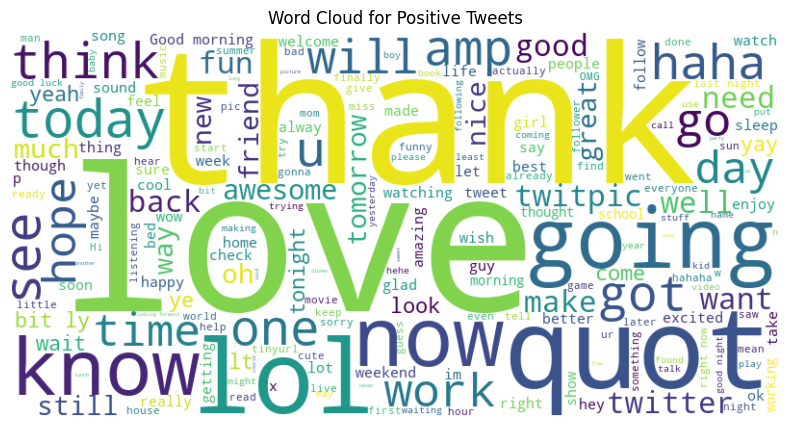

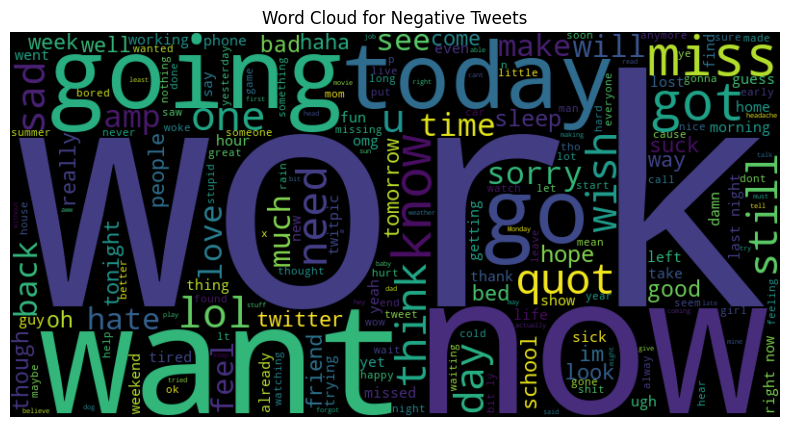

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()